# LIBRARIES

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()

import warnings
warnings.filterwarnings('ignore')

# IMPORTING DATA 

In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [3]:
data_raw = pd.read_csv('/gdrive/My Drive/home credit/application_train.csv', index_col=0)

# EXPLORING DATA 

In [4]:
data_raw.shape

(307511, 121)

In [5]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 100002 to 456255
Columns: 121 entries, TARGET to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 286.2+ MB


In [6]:
data_raw.sample(5)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
361521,0,Cash loans,M,Y,Y,0,180000.0,590337.0,30312.0,477000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,6.0
447253,0,Cash loans,M,N,N,0,135000.0,417708.0,30523.5,369000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
223657,0,Revolving loans,F,Y,Y,1,117000.0,360000.0,18000.0,360000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
418631,0,Cash loans,F,N,Y,0,180000.0,679500.0,36333.0,679500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
429713,0,Cash loans,M,N,Y,2,49500.0,95940.0,11515.5,90000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


# DEFINE TARGET VARIABLE / LABELING

Dalam project membuat prediksi skor kredit ini, tujuan utama adalah untuk melakukan prediksi terhadap suatu individu akan kemampuan mereka untuk dapat memastikan pelanggan yang mampu melakukan pelunasan tidak ditolak ketika melakukan pengajuan pinjaman, dan pinjaman datap diberikan dengan principal, maturity, dan repayment calendar yang akan memotivasi pelanggan untuk sukses. Oleh karena itu, variabel target yang digunakan harus mencerminkan kemampuan individu dalam hal tersebut. 

Dalam dataset ini, variabel `TARGET` adalah variabel yang dapat dijadikan variabel target karena mencerminkan performa masing-masing individu dalam melakukan pelunasan tidak ditolak ketika melakukan pengajuan pinjaman.

In [7]:
data_raw.TARGET.value_counts(normalize=True)*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

Dapat dilihat bahwa variabel `TARGET` memiliki dua nilai:

`1` - klien dengan kesulitan pembayaran: dia memiliki keterlambatan pembayaran lebih dari X hari pada setidaknya satu angsuran Y pertama dari pinjaman dalam sampel kami; `0` - semua kasus lainnya

# CLEANING, PREPROCESSING, FEATURE ENGINEERING

Pada step ini, dilakukan pembersihan/modifikasi beberapa fitur ke dalam format yang dapat digunakan untuk modeling.

# EXPLORATORY DATA ANALYSIS

### Correlation Check

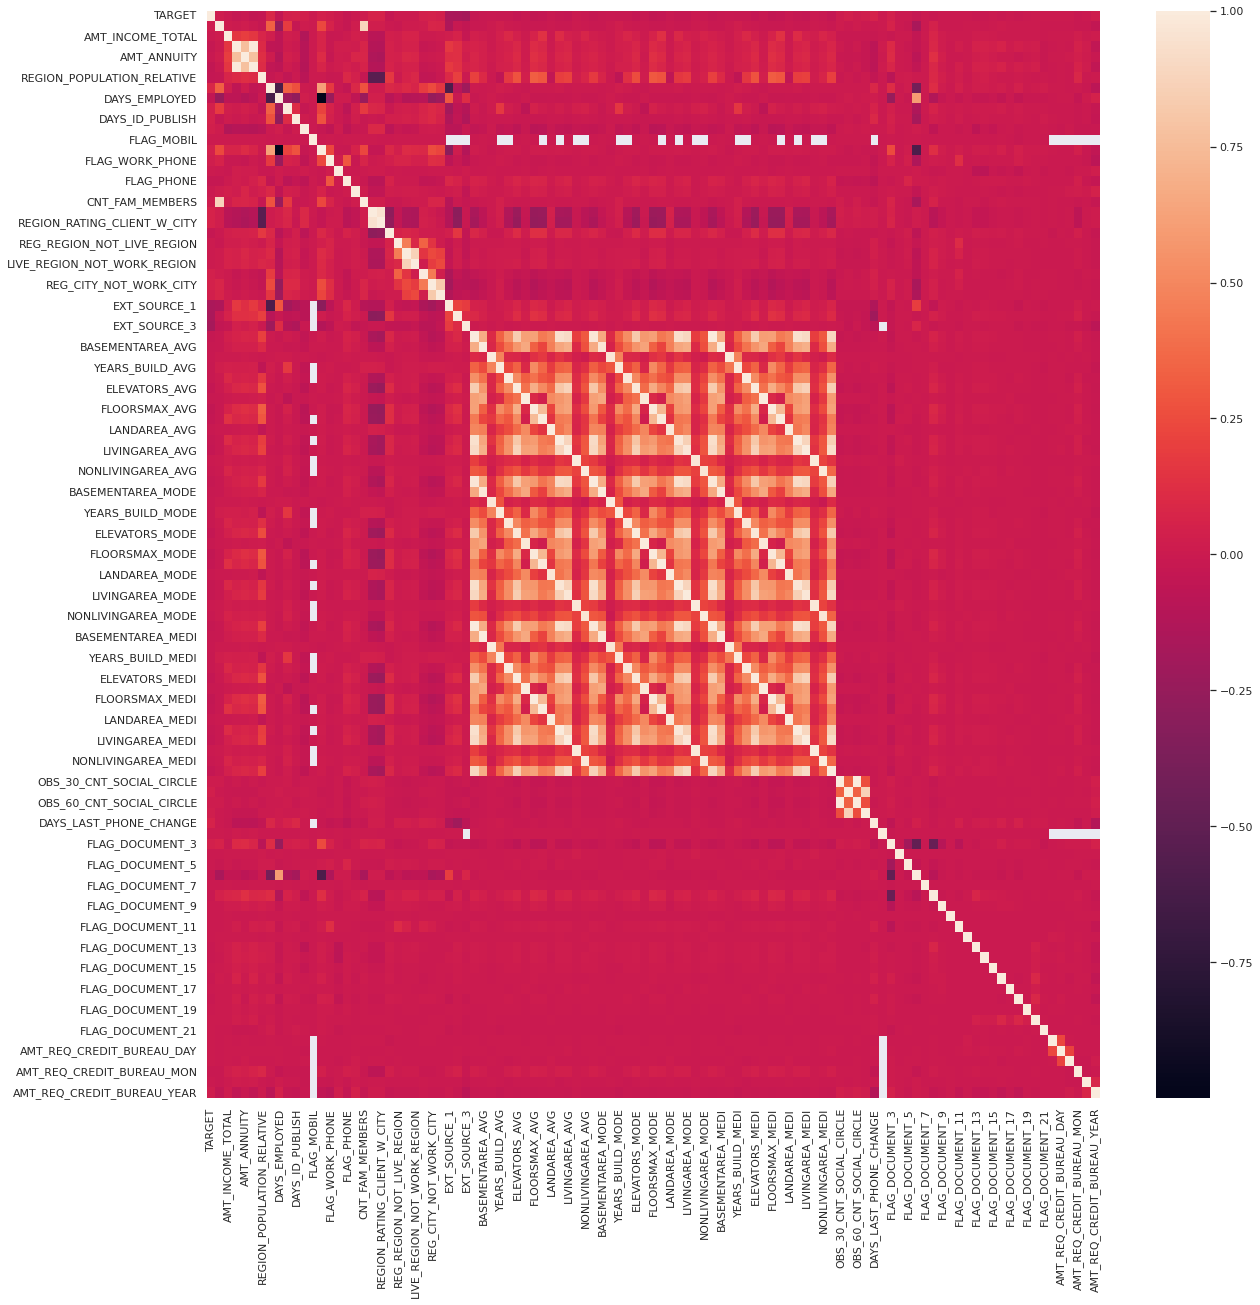

In [8]:
plt.figure(figsize=(20,20))
sns.heatmap(data_raw.corr())

Di sini, jika ada pasangan fitur-fitur yang memiliki korelasi tinggi maka akan diambil salah satu saja. Nilai korelasi yang dijadikan patokan sebagai korelasi tinggi tidak pasti, umumnya digunakan angka 0.7.

In [9]:

corr_matrix = data_raw.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop_hicorr = [column for column in upper.columns if any(upper[column] > 0.7)]

In [10]:
to_drop_hicorr

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'FLAG_EMP_PHONE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT_W_CITY',
 'LIVE_REGION_NOT_WORK_REGION',
 'LIVE_CITY_NOT_WORK_CITY',
 'ELEVATORS_AVG',
 'FLOORSMIN_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'TOTALAREA_MODE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE']

In [11]:
data_raw.drop(to_drop_hicorr, axis=1, inplace=True)

### Check Categorical Features

In [12]:
data_raw.select_dtypes(include='object').nunique()

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

Pada tahap ini dilakukan pembuangan fitur yang memiliki nilai unik yang sangat tinggi (high cardinality) dan fitur yang hanya memiliki satu nilai unik saja.

In [13]:
data_raw.drop(['OCCUPATION_TYPE', 'ORGANIZATION_TYPE'], axis=1, inplace=True)

In [14]:
data_raw.select_dtypes(exclude='object').nunique()

TARGET                           2
CNT_CHILDREN                    15
AMT_INCOME_TOTAL              2548
AMT_CREDIT                    5603
REGION_POPULATION_RELATIVE      81
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY        9
AMT_REQ_CREDIT_BUREAU_WEEK       9
AMT_REQ_CREDIT_BUREAU_MON       24
AMT_REQ_CREDIT_BUREAU_QRT       11
AMT_REQ_CREDIT_BUREAU_YEAR      25
Length: 63, dtype: int64

In [15]:
for col in data_raw.select_dtypes(include='object').columns.tolist():
    print(data_raw[col].value_counts(normalize=True)*100)
    print('\n')

Cash loans         90.478715
Revolving loans     9.521285
Name: NAME_CONTRACT_TYPE, dtype: float64


F      65.834393
M      34.164306
XNA     0.001301
Name: CODE_GENDER, dtype: float64


N    65.989184
Y    34.010816
Name: FLAG_OWN_CAR, dtype: float64


Y    69.367275
N    30.632725
Name: FLAG_OWN_REALTY, dtype: float64


Unaccompanied      81.159562
Family             13.111205
Spouse, partner     3.713029
Children            1.066884
Other_B             0.578018
Other_A             0.282804
Group of people     0.088499
Name: NAME_TYPE_SUITE, dtype: float64


Working                 51.631974
Commercial associate    23.289248
Pensioner               18.003258
State servant            7.057634
Unemployed               0.007154
Student                  0.005853
Businessman              0.003252
Maternity leave          0.001626
Name: NAME_INCOME_TYPE, dtype: float64


Secondary / secondary special    71.018923
Higher education                 24.344820
Incomplete higher                

Karena tidak terdapat fitur yang sangat didominasi oleh salah satu nilai saja maka tidak ada fitur yang dibuang.

# MISSING VALUES

### Missing Value Checking

In [16]:
check_missing = data_raw.isnull().sum() * 100 / data_raw.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

COMMONAREA_AVG                 69.872297
NONLIVINGAPARTMENTS_AVG        69.432963
FONDKAPREMONT_MODE             68.386172
YEARS_BUILD_AVG                66.497784
OWN_CAR_AGE                    65.990810
LANDAREA_AVG                   59.376738
BASEMENTAREA_AVG               58.515956
EXT_SOURCE_1                   56.381073
NONLIVINGAREA_AVG              55.179164
WALLSMATERIAL_MODE             50.840783
APARTMENTS_AVG                 50.749729
ENTRANCES_AVG                  50.348768
HOUSETYPE_MODE                 50.176091
FLOORSMAX_AVG                  49.760822
YEARS_BEGINEXPLUATATION_AVG    48.781019
EMERGENCYSTATE_MODE            47.398304
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
NAME_TYPE_SUITE                 0.420148
DEF_30_CNT_SOCIA

Karena semua kolomnya memiliki missing values di bawah 75% maka tidak ada yang dibuang.

### Missing Values Filling

In [17]:
data_raw['COMMONAREA_AVG'].fillna(0, inplace=True)
data_raw['NONLIVINGAPARTMENTS_AVG'].fillna(0, inplace=True)
data_raw['FONDKAPREMONT_MODE'].fillna('not specified', inplace=True)
data_raw['YEARS_BUILD_AVG'].fillna(0, inplace=True)
data_raw['OWN_CAR_AGE'].fillna(0, inplace=True)
data_raw['LANDAREA_AVG'].fillna(0, inplace=True)
data_raw['BASEMENTAREA_AVG'].fillna(0, inplace=True)
data_raw['EXT_SOURCE_1'].fillna(0, inplace=True)
data_raw['NONLIVINGAREA_AVG'].fillna(0, inplace=True)
data_raw['WALLSMATERIAL_MODE'].fillna('Others', inplace=True)
data_raw['APARTMENTS_AVG'].fillna(0, inplace=True)
data_raw['ENTRANCES_AVG'].fillna(0, inplace=True)
data_raw['HOUSETYPE_MODE'].fillna('not specified', inplace=True)
data_raw['FLOORSMAX_AVG'].fillna(0, inplace=True)
data_raw['YEARS_BEGINEXPLUATATION_AVG'].fillna(0, inplace=True)
data_raw['EMERGENCYSTATE_MODE'].fillna('No', inplace=True)
data_raw['EXT_SOURCE_3'].fillna(0, inplace=True)
data_raw['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(0, inplace=True)
data_raw['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(0, inplace=True)
data_raw['AMT_REQ_CREDIT_BUREAU_MON'].fillna(0, inplace=True)
data_raw['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(0, inplace=True)
data_raw['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(0, inplace=True)
data_raw['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(0, inplace=True)
data_raw['NAME_TYPE_SUITE'].fillna('Unaccompanied', inplace=True)
data_raw['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(0, inplace=True)
data_raw['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(0, inplace=True)
data_raw['EXT_SOURCE_2'].fillna(0, inplace=True)
data_raw['DAYS_LAST_PHONE_CHANGE'].fillna(0, inplace=True)

In [18]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 100002 to 456255
Data columns (total 77 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   TARGET                       307511 non-null  int64  
 1   NAME_CONTRACT_TYPE           307511 non-null  object 
 2   CODE_GENDER                  307511 non-null  object 
 3   FLAG_OWN_CAR                 307511 non-null  object 
 4   FLAG_OWN_REALTY              307511 non-null  object 
 5   CNT_CHILDREN                 307511 non-null  int64  
 6   AMT_INCOME_TOTAL             307511 non-null  float64
 7   AMT_CREDIT                   307511 non-null  float64
 8   NAME_TYPE_SUITE              307511 non-null  object 
 9   NAME_INCOME_TYPE             307511 non-null  object 
 10  NAME_EDUCATION_TYPE          307511 non-null  object 
 11  NAME_FAMILY_STATUS           307511 non-null  object 
 12  NAME_HOUSING_TYPE            307511 non-null  object 

In [19]:
check_missing = data_raw.isnull().sum() * 100 / data_raw.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Series([], dtype: float64)

# FEATURE SCALING AND TRANSFORMATION

### One Hot Encoding

Semua kolom kategorikal dilakukan One Hot Encoding.

---



---

In [20]:
categorical_cols = [col for col in data_raw.select_dtypes(include='object').columns.tolist()]

In [21]:
categorical_cols

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [22]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

In [23]:
encod = pd.DataFrame(data_raw['TARGET'])

for i in categorical_cols:
  encod[i] = label_encoder.fit_transform(data_raw[i])

encod.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,WEEKDAY_APPR_PROCESS_START,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
SK_ID_CURR,,,,,,,,,,,,,,,
100002,1,0,1,0,1,6,7,4,3,1,6,2,0,5,0
100003,0,0,0,0,0,1,4,1,1,1,1,2,0,0,0
100004,0,1,1,1,1,6,7,4,3,1,1,0,1,3,0
100006,0,0,0,0,1,6,7,4,0,1,6,0,1,3,0
100007,0,0,1,0,1,6,7,4,3,1,4,0,1,3,0


### Standardization

Semua kolom numerikal dilakukan proses standarisasi dengan StandardScaler.

In [24]:
numerical_cols = [col for col in data_raw.columns.tolist() if col not in categorical_cols + ['TARGET']]

In [25]:
len(numerical_cols)

62

In [26]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
std = pd.DataFrame(ss.fit_transform(data_raw[numerical_cols]), columns=numerical_cols)

In [27]:
std.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,-0.577538,0.142129,-0.478095,-0.149452,1.506880,-0.456215,0.379837,0.579154,-0.455284,0.001803,...,-0.090534,-0.024402,-0.022529,-0.018305,-0.070987,-0.058766,-0.155837,-0.269947,-0.30862,-0.346719
1,-0.577538,0.426792,1.725450,-1.252750,-0.166821,-0.460115,1.078697,1.790855,-0.455284,0.001803,...,-0.090534,-0.024402,-0.022529,-0.018305,-0.070987,-0.058766,-0.155837,-0.269947,-0.30862,-0.885565
2,-0.577538,-0.427196,-1.152888,-0.783451,-0.689509,-0.453299,0.206116,0.306869,2.430559,0.001803,...,-0.090534,-0.024402,-0.022529,-0.018305,-0.070987,-0.058766,-0.155837,-0.269947,-0.30862,-0.885565
3,-0.577538,-0.142533,-0.711430,-0.928991,-0.680114,-0.473217,-1.375829,0.369143,-0.455284,0.001803,...,-0.090534,-0.024402,-0.022529,-0.018305,-0.070987,-0.058766,-0.155837,-0.269947,-0.30862,-0.885565
4,-0.577538,-0.199466,-0.213734,0.563570,-0.892535,-0.473210,0.191639,-0.307263,-0.455284,0.001803,...,-0.090534,-0.024402,-0.022529,-0.018305,-0.070987,-0.058766,-0.155837,-0.269947,-0.30862,-0.885565


### Transformed Dataframe

Menggabungkan kembali kolom-kolom hasil transformasi 

In [28]:
data_model = pd.concat([encod.drop('TARGET', axis=1), std, data_raw[['TARGET']]], axis=1)

In [29]:
data_model.dropna(axis=0, inplace=True)

# MODELING

### Train-Test Split

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X = data_model.drop('TARGET', axis=1)
y = data_model['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
X_train.shape, X_test.shape

((143258, 76), (35815, 76))

### Training

Pada contoh ini digunakan algoritma Random Forest untuk pemodelan.

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report

Random Forest Classifier:

In [34]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [35]:
# testing
y_pred = rfc.predict(X_test)

# evaluasi
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     32857
         1.0       0.00      0.00      0.00      2958

    accuracy                           0.92     35815
   macro avg       0.46      0.50      0.48     35815
weighted avg       0.84      0.92      0.88     35815



Logistic Regression:

In [36]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [37]:
# testing
y_pred = lr.predict(X_test)

# evaluasi
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     32857
         1.0       0.00      0.00      0.00      2958

    accuracy                           0.92     35815
   macro avg       0.46      0.50      0.48     35815
weighted avg       0.84      0.92      0.88     35815

